# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): EDA
### <center>Predict whether income exceeds $50K/yr based on census data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/2.%20Tabular%20data%20(clas)/data/titanic_train.csv

In [3]:
df = pd.read_csv("data/kaggle_titanic_train.csv", index_col="PassengerId")

In [4]:
df["Survived"][df["Survived"]==1] = "Survived"
df["Survived"][df["Survived"]==0] = "Died"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Survived,891,2,Died,549
Name,891,891,"Mockler, Miss. Helen Mary ""Ellie""",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


# <center> Univariate analysis

In [29]:
# Variables numéricas
def plot_num(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"

    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title, fontsize=20)
    ax2 = ax.twinx()
    sns.violinplot(variable, cut=0, palette="Set3", inner="box", ax=ax)
    sns.scatterplot(variable, y=variable.index, color="grey", linewidth=0, s=20, alpha=.3, ax=ax2).invert_yaxis()
    
def plot_num2(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    plt.figure(figsize=size)
    sns.violinplot(variable, cut=0, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.5).set_title(title, fontsize=20);
    
# Variables ordinales
def plot_ord(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sns.countplot(variable, color='royalblue').set_title(title, fontsize=20);
    
# Variables categoricas
def plot_cat(variable, title="", size=(16,4)):
    plt.figure(figsize=size)
    sns.countplot(y=variable, order=variable.value_counts().index).set_title(title, fontsize=20);

# Variables numéricas (números con decinales)

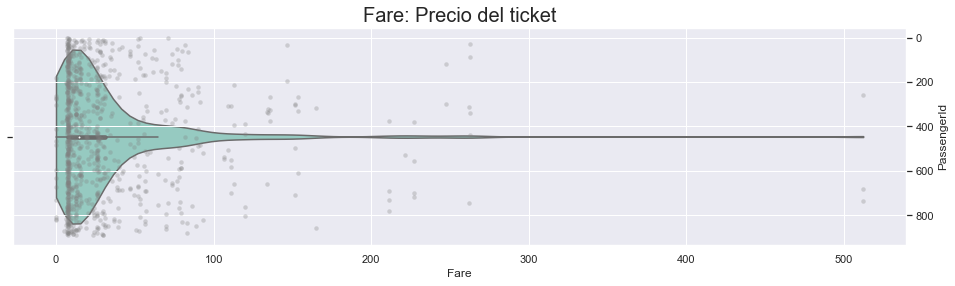

In [31]:
plot_num(df["Fare"], "Fare: Precio del ticket")

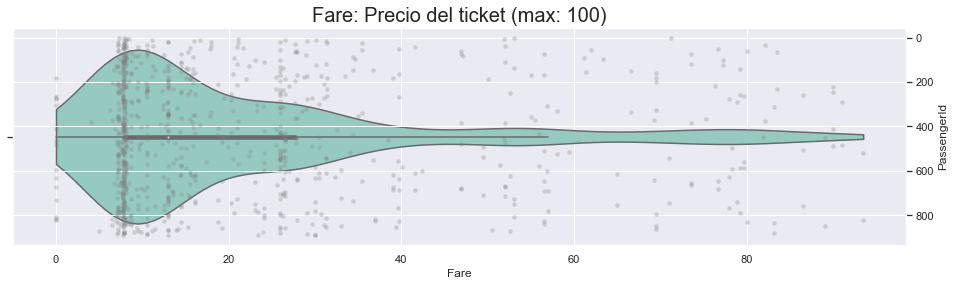

In [38]:
plot_num(df["Fare"], "Fare: Precio del ticket", max=100)

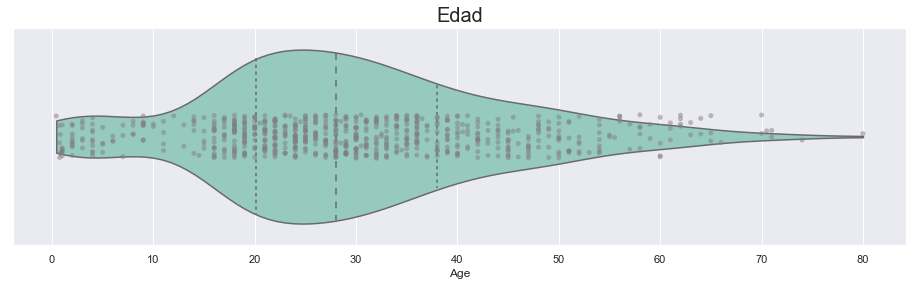

In [35]:
plot_num2(df.Age, "Edad")

# Variables ordinales (números enteros)

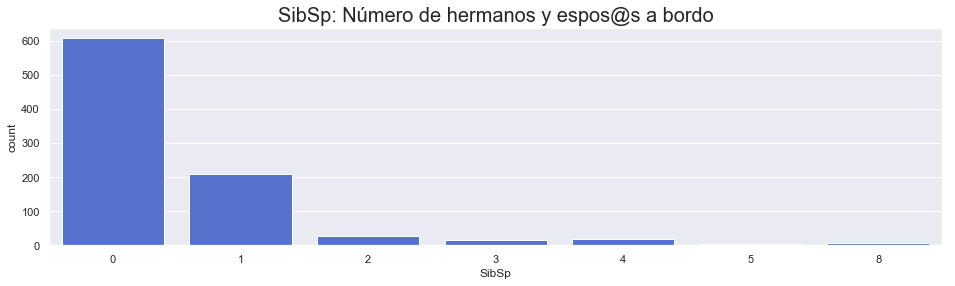

In [34]:
plot_ord(df["SibSp"], "SibSp: Número de hermanos y espos@s a bordo")

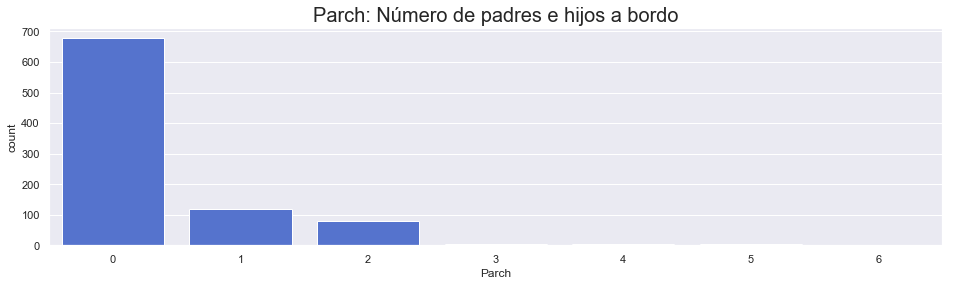

In [14]:
plot_ord(df["Parch"], "Parch: Número de padres e hijos a bordo")

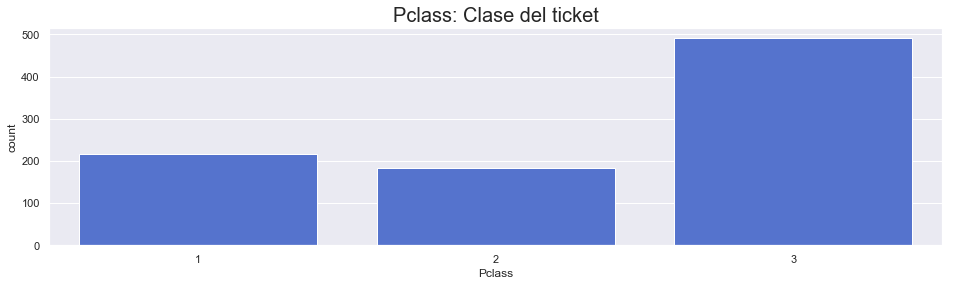

In [15]:
plot_ord(df["Pclass"], "Pclass: Clase del ticket")

# Variables nominales (categorías)

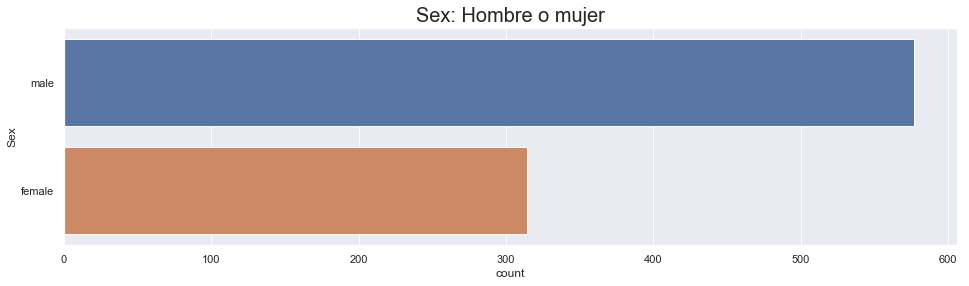

In [16]:
plot_cat(df["Sex"], "Sex: Hombre o mujer")

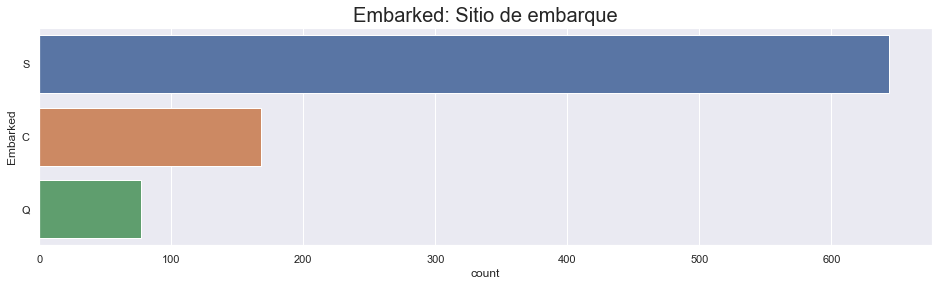

In [17]:
plot_cat(df["Embarked"], "Embarked: Sitio de embarque")

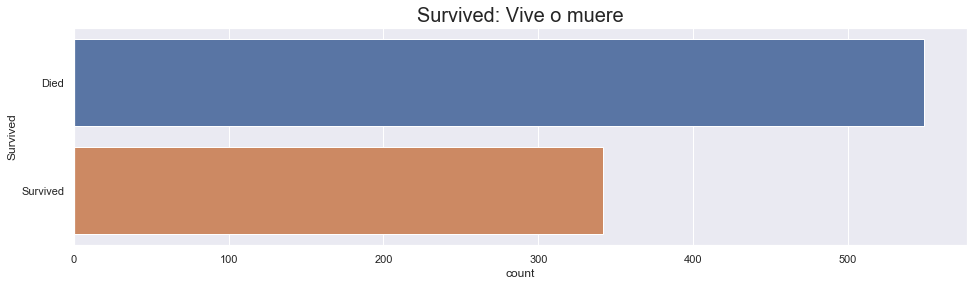

In [18]:
plot_cat(df["Survived"], "Survived: Vive o muere")

In [19]:
df["Ticket"].value_counts()

347082             7
1601               7
CA. 2343           7
CA 2144            6
347088             6
                  ..
349224             1
SC/AH Basle 541    1
330979             1
349218             1
345778             1
Name: Ticket, Length: 681, dtype: int64

In [20]:
df["Name"].value_counts()

Skoog, Master. Karl Thorsten              1
Simonius-Blumer, Col. Oberst Alfons       1
Parkes, Mr. Francis "Frank"               1
Larsson, Mr. Bengt Edvin                  1
Allen, Miss. Elisabeth Walton             1
                                         ..
Bourke, Miss. Mary                        1
Karaic, Mr. Milan                         1
Jensen, Mr. Hans Peder                    1
Laroche, Mr. Joseph Philippe Lemercier    1
Nicola-Yarred, Master. Elias              1
Name: Name, Length: 891, dtype: int64

# Missings

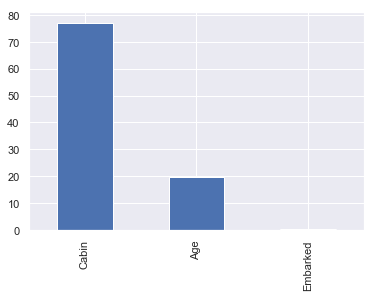

In [21]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(df)

In [22]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

df["Age"]=mean_imputer.fit_transform(df[["Age"]]).ravel()
df["Embarked"]=mode_imputer.fit_transform(df[["Embarked"]]).ravel()
df.drop(columns=['Cabin'], inplace=True)

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,Died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,Died,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,Survived,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


## Tipos de variables

In [26]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare']

Categorical features:
 ['Survived' 'Name' 'Sex' 'Ticket' 'Embarked']

Date/time features:
 []


# Encode categorical

In [27]:
from sklearn.preprocessing   import LabelEncoder


df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,2
2,1,1,190,0,38.0,1,0,596,71.2833,0
3,1,3,353,0,26.0,0,0,669,7.9250,2
4,1,1,272,0,35.0,1,0,49,53.1000,2
5,0,3,15,1,35.0,0,0,472,8.0500,2


In [28]:
len(df)

891

# Pairplot

In [29]:
#feats = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Cabin', 'Embarked']
#sns.pairplot(df[feats]);

# Pairplot en funcion de la variable a predecir

In [30]:
#feats = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Cabin', 'Embarked']
#sns.pairplot(df[feats], hue="Survived", dropna=True);

# Reducción de la dimensionalidad

In [54]:
tsne_feats = ['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [63]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=40, n_jobs=-1)
X = df[tsne_feats].fillna(0.).values
tsne = model.fit_transform(X)

df['tsne1']   = tsne[:,0]
df['tsne2']   = tsne[:,1]

In [64]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Survived:N',
    #tooltip=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [65]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Fare:Q',
).properties(width=400, height=400)

alt.Chart(...)

In [66]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Pclass:N',
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [67]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Sex:N',
).properties(width=400, height=400)

alt.Chart(...)

In [68]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Embarked:N',
).properties(width=400, height=400)

alt.Chart(...)